In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore") 

In [2]:
cleaned_data = pd.read_csv("data/cleaned_data/cleaned_data.csv")
cleaned_data.head()

,Unnamed: 0,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Weekday,Season,Dep_Time_Hour,Dep_Time_Min,Duration_Min
0,0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,March,Sunday,Spring,22,20,170
1,1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,May,Wednesday,Spring,5,50,445
2,2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,June,Sunday,Summer,9,25,1140
3,3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,May,Sunday,Spring,18,5,325
4,4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,March,Friday,Spring,16,50,285


In [3]:
cleaned_data.drop(["Unnamed: 0"] , axis = 1 , inplace = True) #Removing the redundant column.

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10517 non-null  object
 1   Source           10517 non-null  object
 2   Destination      10517 non-null  object
 3   Total_Stops      10516 non-null  object
 4   Additional_Info  10517 non-null  object
 5   Price            10517 non-null  int64 
 6   Day              10517 non-null  int64 
 7   Month            10517 non-null  object
 8   Weekday          10517 non-null  object
 9   Season           10517 non-null  object
 10  Dep_Time_Hour    10517 non-null  int64 
 11  Dep_Time_Min     10517 non-null  int64 
 12  Duration_Min     10517 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.0+ MB


We have to change the `Dep_Time_Hour` data type from int to object.Because we can not assign every value to this column.

In [5]:
cleaned_data["Dep_Time_Hour"] = cleaned_data["Dep_Time_Hour"].astype("object")

In [6]:
# Splitting feartures and labels in our data
X = cleaned_data.drop(["Duration_Min" , "Price"] , axis = 1)
y = pd.DataFrame(cleaned_data[["Duration_Min" , "Price"]])

### Train_Test_Split
As soon as we receive the data we have to split it into training set and test set.By doing this we can prevent the `data leakage` phenomenon in the feature engineering phase.

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , shuffle = True , random_state = 1)

In [8]:
print("X_train.shape : " , X_train.shape)
print("X_test.shape : " , X_test.shape)
print("y_train.shape : " , y_train.shape)
print("y_test.shape : " , y_test.shape)

X_train.shape :  (7887, 11)
X_test.shape :  (2630, 11)
y_train.shape :  (7887, 2)
y_test.shape :  (2630, 2)


In [9]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Weekday,Season,Dep_Time_Hour,Dep_Time_Min
2237,Air India,Banglore,Delhi,non-stop,No info,21,May,Tuesday,Spring,10,0
9617,IndiGo,Delhi,Cochin,1 stop,No info,9,March,Saturday,Spring,20,30
686,IndiGo,Delhi,Cochin,1 stop,No info,27,May,Monday,Spring,7,35
7684,Vistara,Kolkata,Banglore,1 stop,No info,1,April,Monday,Spring,7,10
7838,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,1,June,Saturday,Summer,22,50


In [10]:
X_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Weekday,Season,Dep_Time_Hour,Dep_Time_Min
587,Air India,Banglore,Delhi,non-stop,No info,18,May,Saturday,Spring,10,0
830,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,15,June,Saturday,Summer,14,0
2857,IndiGo,Kolkata,Banglore,non-stop,No info,24,June,Monday,Summer,17,15
5655,SpiceJet,Chennai,Kolkata,non-stop,No info,24,May,Friday,Spring,9,45
1005,Air India,Delhi,Cochin,2 stops,No info,21,May,Tuesday,Spring,22,0


## Feature Engineering
### Checking For NaN Values

In [11]:
X_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Day                0
Month              0
Weekday            0
Season             0
Dep_Time_Hour      0
Dep_Time_Min       0
dtype: int64

As we have one missing value in the `Total_Stops` column, so we fill it with `1 stop` value.So it will not bias the dataset very much.

In [12]:
X_train["Total_Stops"].fillna("1 stop" , inplace = True)

In [13]:
X_test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Day                0
Month              0
Weekday            0
Season             0
Dep_Time_Hour      0
Dep_Time_Min       0
dtype: int64

In [14]:
X_test["Total_Stops"].fillna("1 stop" , inplace = True)

In [15]:
y_train.isnull().sum()

Duration_Min    0
Price           0
dtype: int64

In [16]:
y_test.isnull().sum()

Duration_Min    0
Price           0
dtype: int64

## Label Encoding
### Frequency/Count Encoding

The advantage of this encoding method is that it will not produce extra columns so we will not be facing the `curse of dimensionality`.The main disadvantage is that we assign some random numeric labels to each and every category.So it will reduce the predictive power of this feature.




Before appplying any encoding method first we have to ensure that the number of labels of each categorical feature is same for both X_train and y_train datasets.

In [17]:
for i in X_train.columns:
  if X_train[i].dtype == "object":
    print(i,":",len(X_train[i].unique()),"labels")
  else:
    continue

Airline : 11 labels
Source : 5 labels
Destination : 6 labels
Total_Stops : 5 labels
Additional_Info : 6 labels
Month : 4 labels
Weekday : 7 labels
Season : 2 labels
Dep_Time_Hour : 24 labels


In [18]:
for i in X_test.columns:
  if X_test[i].dtype == "object":
    print(i,":",len(X_test[i].unique()),"labels")
  else:
    continue

Airline : 10 labels
Source : 5 labels
Destination : 6 labels
Total_Stops : 4 labels
Additional_Info : 6 labels
Month : 4 labels
Weekday : 7 labels
Season : 2 labels
Dep_Time_Hour : 24 labels


As we can see the number of labels for both datasets is almost the same, except for two columns.If we pay more attention to this case, we realize that some labels(those have extremely less number of occurance in the dataset) are not in the test data which in this case it makes no difference.

In [19]:
# Getting the value_counts of every categories and passing them to a dictionary
train_airline_map = X_train["Airline"].value_counts().to_dict()
train_source_map = X_train["Source"].value_counts().to_dict()
train_destination_map = X_train["Destination"].value_counts().to_dict()

**Note**: We have to use the same encoded values in the training set and test set.Because our model trains on the training set, every time we use the same encoded values of training set for the test set to model predict properly the test set values.

In [20]:
X_train["Airline"] = X_train["Airline"].map(train_airline_map)
X_train["Source"] = X_train["Source"].map(train_source_map)
X_train["Destination"] = X_train["Destination"].map(train_destination_map)

X_test["Airline"] = X_test["Airline"].map(train_airline_map)
X_test["Source"] = X_test["Source"].map(train_source_map)
X_test["Destination"] = X_test["Destination"].map(train_destination_map)

### One-Hot-Encoding
The advantage of this method is that it is our default choice to encode the categorical columns and it is very easy to implement and straightforward.The main disadvantage is that, if our feature contains lots of categories,this method produce lots of columns which will lead to high dimensionality curse.
#### X_train

In [21]:
Month_train = X_train["Month"]
Month_train = pd.get_dummies(Month_train , prefix = "Month" , drop_first = True)
Month_train.head()

,Month_June,Month_March,Month_May
2237,0,0,1
9617,0,1,0
686,0,0,1
7684,0,0,0
7838,1,0,0


In [22]:
Season_train = X_train["Season"]
Season_train = pd.get_dummies(Season_train , prefix = "Season" , drop_first = True)
Season_train.head()

,Season_Summer
2237,0
9617,0
686,0
7684,0
7838,1


In [23]:
X_train = pd.concat([X_train , Month_train , Season_train] , axis = 1)

#### X_test

In [24]:
Month_test = X_test["Month"]
Month_test = pd.get_dummies(Month_test , prefix = "Month" , drop_first = True)
Month_test.head()

,Month_June,Month_March,Month_May
587,0,0,1
830,1,0,0
2857,1,0,0
5655,0,0,1
1005,0,0,1


In [25]:
Season_test = X_test["Season"]
Season_test = pd.get_dummies(Season_test , prefix = "Season" , drop_first = True)
Season_test.head()

,Season_Summer
587,0
830,1
2857,1
5655,0
1005,0


In [27]:
X_test = pd.concat([X_test , Month_test , Season_test] , axis = 1)

### Cyclical Features Encoding
If we pay attention to our dataset, we can see that some feartures have cyclical attribute.Like weekday,hour,etc.For instance we can not label Monday to Sunday from 0...6 this is because in real life monday is after sunday so their difference is 1.In this situations we have to use cyclical feature encoding which leads to model improvement.

to implement this we have to get the sin and cos values of every feature values and put them into two columns.The main disadvantage of this method is that we convert one categorical features into two distinct columns(which are highly dependent on each other).This maybe a problem for tree models which split the features randomly.

In [28]:
# First we have to label the weekday names with numerical values to implement the cyclical feature encoding.
weekday_map = {"Monday" : 1,
               "Tuesday" : 2,
               "Wednesday" : 3,
               "Thursday" : 4,
               "Friday" : 5,
               "Saturday" : 6,
               "Sunday" : 7
              }
X_train["Weekday"] = X_train["Weekday"].map(weekday_map)
X_test["Weekday"] = X_test["Weekday"].map(weekday_map)

#### X_train

In [29]:
X_train["Weekday"] = X_train["Weekday"].astype("int32")
X_train["Dep_Time_Hour"] = X_train["Dep_Time_Hour"].astype("int32")

In [30]:
# 
X_train["Dep_Hour_Sin"] = round(np.sin(X_train["Dep_Time_Hour"] * (2 * np.pi / X_train["Dep_Time_Hour"].nunique())) , 2)
X_train["Dep_Hour_Cos"] = round(np.cos(X_train["Dep_Time_Hour"] * (2 * np.pi / X_train["Dep_Time_Hour"].nunique())) , 2)

X_train["Dep_Min_Sin"] = round(np.sin(X_train["Dep_Time_Min"] * (2 * np.pi / X_train["Dep_Time_Min"].nunique())) , 2)
X_train["Dep_Min_Cos"] = round(np.cos(X_train["Dep_Time_Min"] * (2 * np.pi / X_train["Dep_Time_Min"].nunique())) , 2)

X_train["Day_Sin"] = round(np.sin(X_train["Day"] * (2 * np.pi / X_train["Day"].nunique())) , 2)
X_train["Day_Cos"] = round(np.cos(X_train["Day"] * (2 * np.pi / X_train["Day"].nunique())) , 2)

X_train["Weekday_Sin"] = round(np.sin(X_train["Weekday"] * (2 * np.pi / X_train["Weekday"].nunique())) , 2)
X_train["Weekday_Cos"] = round(np.cos(X_train["Weekday"] * (2 * np.pi / X_train["Weekday"].nunique())) , 2)

(-1.1, 1.1, -1.1, 1.1)

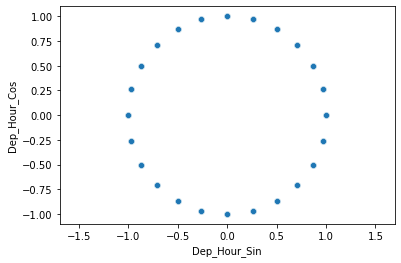

In [31]:
sns.scatterplot(data=X_train, x="Dep_Hour_Sin", y="Dep_Hour_Cos")
plt.axis("equal")

(-1.067, 1.067, -0.995, 1.095)

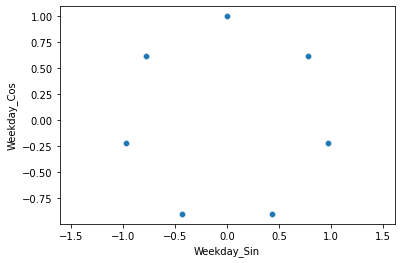

In [32]:
sns.scatterplot(data=X_train, x="Weekday_Sin", y="Weekday_Cos")
plt.axis("equal")

(-1.1, 1.1, -1.1, 1.1)

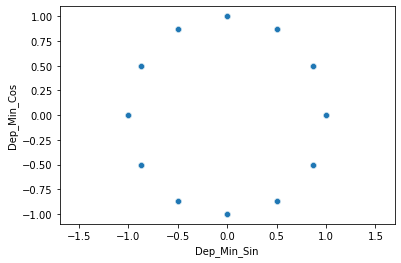

In [33]:
sns.scatterplot(data=X_train, x="Dep_Min_Sin", y="Dep_Min_Cos")
plt.axis("equal")

(-1.045, 1.045, -1.0905, 0.9005000000000001)

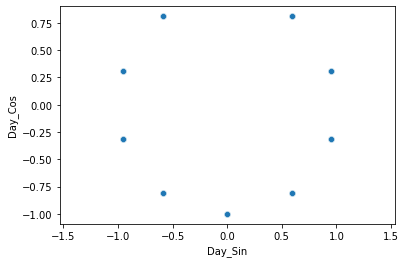

In [34]:
sns.scatterplot(data=X_train, x="Day_Sin", y="Day_Cos")
plt.axis("equal")

#### X_test

In [35]:
X_test["Weekday"] = X_test["Weekday"].astype("int32")
X_test["Dep_Time_Hour"] = X_test["Dep_Time_Hour"].astype("int32")

In [36]:
X_test["Dep_Hour_Sin"] = round(np.sin(X_test["Dep_Time_Hour"] * (2 * np.pi / X_test["Dep_Time_Hour"].nunique())) , 2)
X_test["Dep_Hour_Cos"] = round(np.cos(X_test["Dep_Time_Hour"] * (2 * np.pi / X_test["Dep_Time_Hour"].nunique())) , 2)

X_test["Dep_Min_Sin"] = round(np.sin(X_test["Dep_Time_Min"] * (2 * np.pi / X_test["Dep_Time_Min"].nunique())) , 2)
X_test["Dep_Min_Cos"] = round(np.cos(X_test["Dep_Time_Min"] * (2 * np.pi / X_test["Dep_Time_Min"].nunique())) , 2)

X_test["Day_Sin"] = round(np.sin(X_test["Day"] * (2 * np.pi / X_test["Day"].nunique())) , 2)
X_test["Day_Cos"] = round(np.cos(X_test["Day"] * (2 * np.pi / X_test["Day"].nunique())) , 2)

X_test["Weekday_Sin"] = round(np.sin(X_test["Weekday"] * (2 * np.pi / X_test["Weekday"].nunique())) , 2)
X_test["Weekday_Cos"] = round(np.cos(X_test["Weekday"] * (2 * np.pi / X_test["Weekday"].nunique())) , 2)

### Label Encoding(Ordinal Categorical Column)
As we know the more number of stops in traveling we have, the more money we have to pay.So the `Total_Stops` has a positive relationship with `Price` and `Duration`.So we have to treat this column as a ordinal categorical column and map the numerical values with respect to their price value.

In [37]:
stops_map = {
    "non-stop" : 1,
    "1 stop" : 2,
    "2 stops" : 3,
    "3 stops" : 4,
    "4 stops" : 5
}
X_train["Total_Stops"] = X_train["Total_Stops"].map(stops_map)
X_test["Total_Stops"] = X_test["Total_Stops"].map(stops_map)

### Dropping Redundant Columns

In [38]:
redundant_columns = ["Additional_Info" , "Weekday" , "Day" , "Dep_Time_Min", "Dep_Time_Hour", "Month" , "Season"]
X_train.drop(redundant_columns ,axis = 1, inplace = True)
X_test.drop(redundant_columns ,axis = 1, inplace = True)

In [39]:
categorical_lst = ["Airline" , "Source" , "Destination" , "Month_March",
                  "Month_June" , "Month_May" , "Season_Summer"]
# Converting every column data type into object data type
for i in categorical_lst:
    X_train[i] = X_train[i].astype("object")
    X_test[i] = X_test[i].astype("object")

## Feature Selection
Another important stage of a machine learning project is feature selection which with various methods such as statistical test and tree models we are able to detect most important features and drop redundant features.

In [40]:
from scipy import stats
from sklearn.feature_selection import mutual_info_regression

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7887 entries, 2237 to 235
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        7887 non-null   object 
 1   Source         7887 non-null   object 
 2   Destination    7887 non-null   object 
 3   Total_Stops    7887 non-null   int64  
 4   Month_June     7887 non-null   object 
 5   Month_March    7887 non-null   object 
 6   Month_May      7887 non-null   object 
 7   Season_Summer  7887 non-null   object 
 8   Dep_Hour_Sin   7887 non-null   float64
 9   Dep_Hour_Cos   7887 non-null   float64
 10  Dep_Min_Sin    7887 non-null   float64
 11  Dep_Min_Cos    7887 non-null   float64
 12  Day_Sin        7887 non-null   float64
 13  Day_Cos        7887 non-null   float64
 14  Weekday_Sin    7887 non-null   float64
 15  Weekday_Cos    7887 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 1.0+ MB


### Scikit-Learn's Mutual Info

It can help us to evaluate every column to understand which columns have the highest dependencies on the target value.

In [45]:
def mutual_info(data ,target_feature):
    mutual_info = mutual_info_regression(data.fillna(0) , target_feature)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = data.columns
    mutual_info = mutual_info.sort_values(ascending = False)
    mutual_info.sort_values(ascending = False).plot.bar(figsize = (12 , 8))

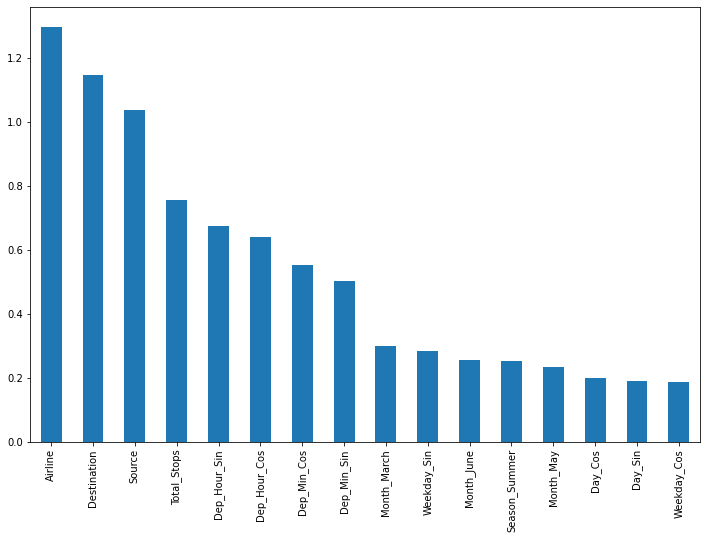

In [46]:
mutual_info(X_train ,y_train["Price"])

`Airline`,`Desination` and `Source` have the highest predictive power with respect to `Price` target value.

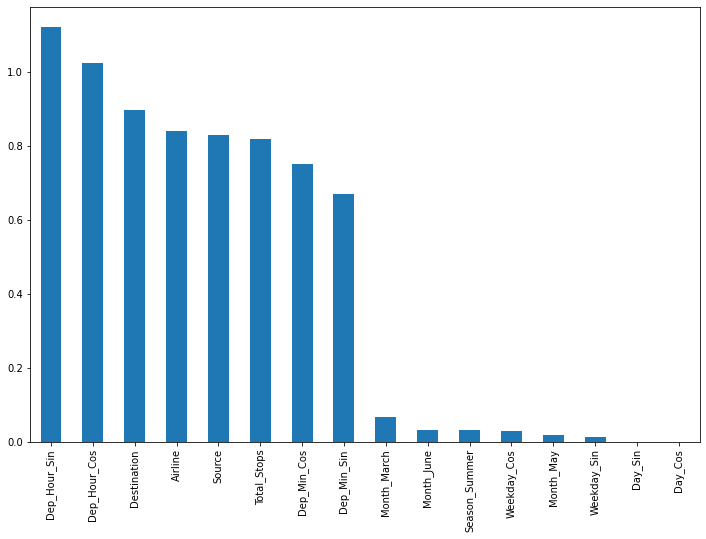

In [48]:
mutual_info(X_train ,y_train["Duration_Min"])

And at last `Dep_Hour_Sin`,`Dep_Hour_Cos` and `Destination` are the most important features with respect to the `Duration` because usually the duration of the traveling is dependent on your departure time.It is obvious that `Day_Sin` and `Day_Cos` are the least important features.This is because the day itself can not estimate the duration of the traveling.

### Feature Importance

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

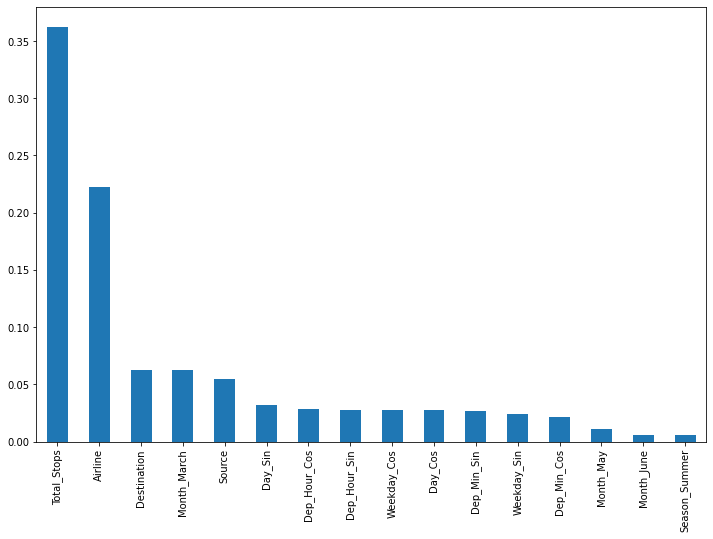

In [51]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending = False).plot(kind='bar')
plt.show()

### Correlation
When we want to compare two continuous features we use correlation.Correlation can help us to detect two dependent features and remove one of them.By doing this we reduce the dimensionality of our dataset.

<AxesSubplot:>

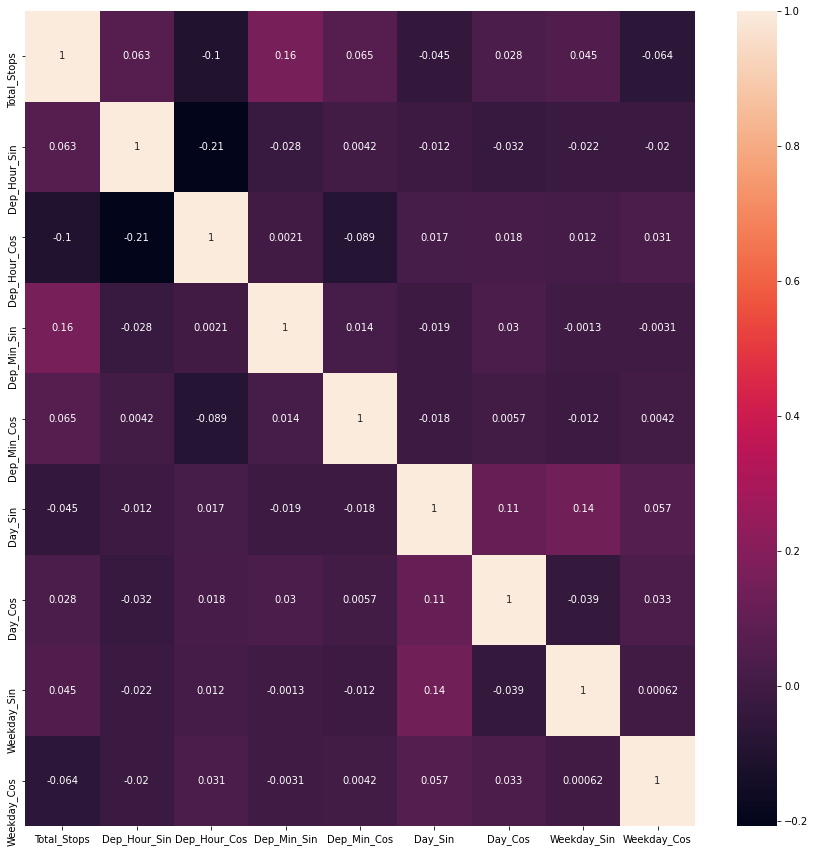

In [52]:
corr = X_train.corr()
plt.figure(figsize=(15 , 15))
sns.heatmap(corr , annot = True)

### ANOVA Test
When we want to compare one categorical column and one continuous column or sevral categorical columns with one continuous column we use ANOVA test.

In [53]:
def anova_evaluation(categorical_col , continuous_col , alpha = 0.05):
  df_anova = pd.concat([categorical_col , continuous_col] , axis = 1)
  groups = pd.unique(categorical_col.values)
  d_data = {group : df_anova[continuous_col.name][df_anova[categorical_col.name] == group] for group in groups}
  col_list = []
  for i in categorical_col.unique():
    col_list.append(d_data[i])
  F, p = stats.f_oneway(*col_list)
  print("p-value : " , p)
  print("significance value : " , alpha)
  print("\n" + "-" * 60)
  if p < alpha:
    return "Rejecting Null Hypothesis.There is a relationship between {} and {} columns.".format(categorical_col.name , continuous_col.name)
  else:
    return "Accepting Null Hypothesis.There is no relationship between {} and {} columns.".format(categorical_col.name , continuous_col.name)

In [54]:
for i in X_train.columns:
    if X_train[i].dtype == "object":
        print(anova_evaluation(X_train[i] , y_train["Price"]))
        print("\n"  , "-" * 70)
    else:
        continue           

p-value :  0.0
significance value :  0.05

------------------------------------------------------------
Rejecting Null Hypothesis.There is a relationship between Airline and Price columns.

 ----------------------------------------------------------------------
p-value :  0.0
significance value :  0.05

------------------------------------------------------------
Rejecting Null Hypothesis.There is a relationship between Source and Price columns.

 ----------------------------------------------------------------------
p-value :  0.0
significance value :  0.05

------------------------------------------------------------
Rejecting Null Hypothesis.There is a relationship between Destination and Price columns.

 ----------------------------------------------------------------------
p-value :  0.3087021867495704
significance value :  0.05

------------------------------------------------------------
Accepting Null Hypothesis.There is no relationship between Month_June and Price columns.

 -

In [55]:
#X_train.to_csv("data/cleaned_data/X_train.csv")
#X_test.to_csv("data/cleaned_data/X_test.csv")
#y_train.to_csv("data/cleaned_data/y_train.csv")
#y_test.to_csv("data/cleaned_data/y_test.csv")